In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [12]:
path = "../data_clean/master.csv"

df = pd.read_csv(path)
df = gpd.GeoDataFrame(
    df.loc[:, [c for c in df.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(df["geometry"]),
)
df.head()

,month,departement,nb_rsa,nb_aah,nb_ass,nb_prime_activite,nb_aide_logement,nb_garantie_jeune,nb_garantie_jeune_mois,year,code,population,nom,geometry
0,2017-02-01,ain,7630.0,6690.0,2270.0,18150.0,37660.0,183.0,163.0,2017,01,643350.0,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,2017-03-01,ain,7630.0,6700.0,2260.0,18490.0,37920.0,219.0,191.0,2017,01,643350.0,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
2,2017-04-01,ain,7630.0,6730.0,2250.0,18510.0,38070.0,211.0,181.0,2017,01,643350.0,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
3,2017-05-01,ain,7590.0,6770.0,2210.0,18820.0,38160.0,245.0,195.0,2017,01,643350.0,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
4,2017-06-01,ain,7600.0,6800.0,2180.0,18940.0,38170.0,275.0,235.0,2017,01,643350.0,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."


In [13]:
for c in df.columns:
    if "nb_" in c:
        df[c.replace("nb_", "pct_")] = df[c] / df["population"]

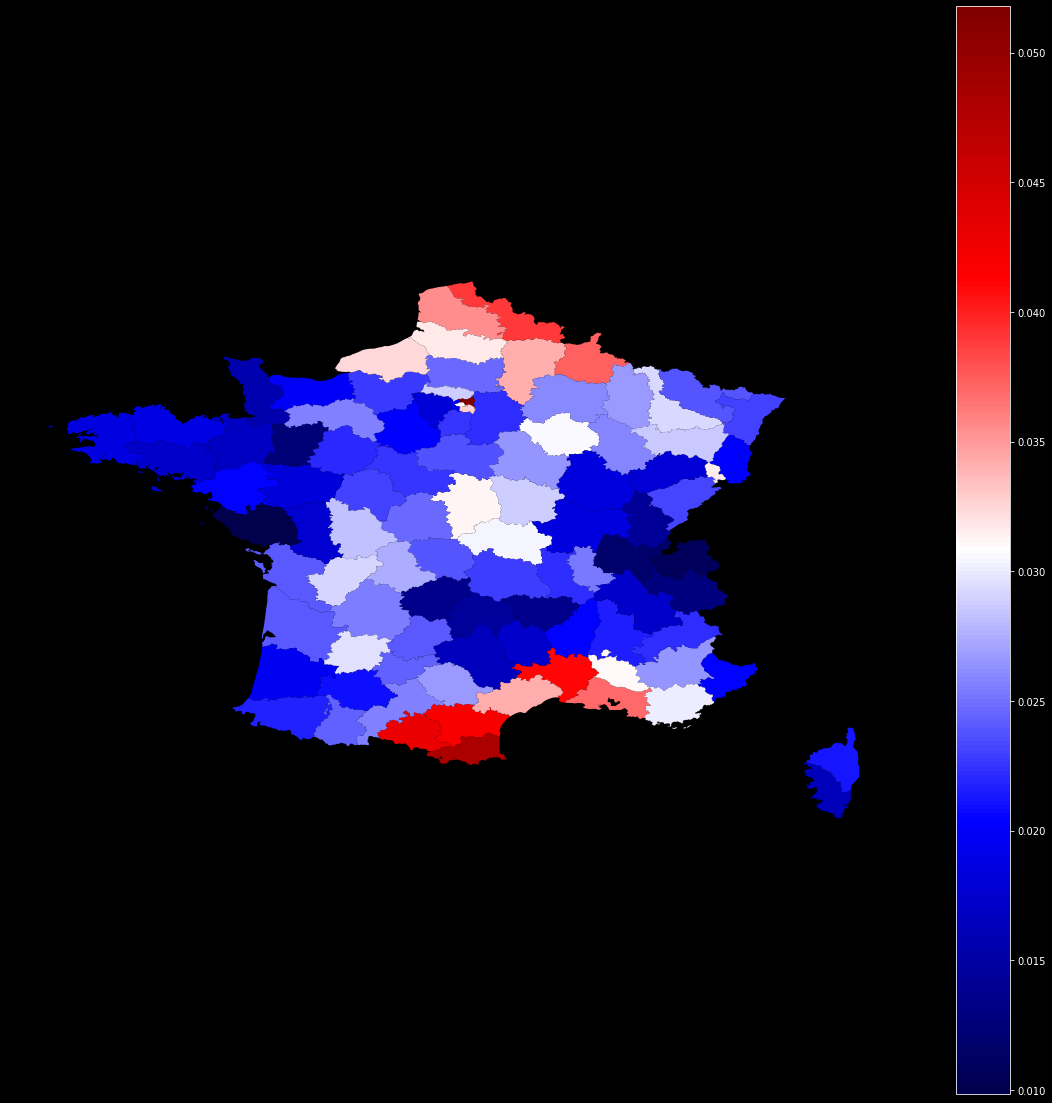

In [32]:
year = 2022
value = "pct_rsa"

month = f"{year}-01-01"

df_temp = df[df["month"].str.strip() == month]


with plt.style.context("dark_background"):
    df_temp.plot(
        value,
        cmap="seismic",
        figsize=(20, 20),
        legend=True
    )
    
    # plt.title(f"{value} - {year}")
    
    plt.axis("off")
    plt.savefig(f"../images/maps/{value}_{year}.png")
    
    plt.show()